In [31]:
  import pandas as pd
  import matplotlib.pyplot as plt
  from collections import Counter

In [8]:
cd "/content/drive/My Drive/Colab Notebooks/dw_transform/transform_three/dw_road_sign"

/content/drive/My Drive/Colab Notebooks/dw_transform/transform_three/dw_road_sign


In [13]:
ls data

signnames.csv  test.p  train.p


In [15]:
train = pd.read_pickle("data/train.p")
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [16]:
X_train, y_train = train["features"], train["labels"]
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [22]:
signs = pd.read_csv("data/signnames.csv")
signs.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


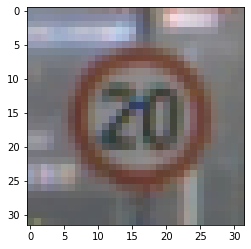

In [21]:
plt.imshow( X_train[10000] )

In [23]:
dict_signs = signs.to_dict()["b"]
dict_signs[30]

'Beware of ice/snow'

In [30]:
for id_sign in dict_signs.keys():
  given_signs = X_train[ y_train == id_sign]
  plt.figure(figsize=(15, 5))
  for i in range(9):
    plt.subplot("19{0}".format(i+1))
    plt.imshow(given_signs[i])
    plt.axis("off")

plt.tight_layout()
plt.show()    

Output hidden; open in https://colab.research.google.com to view.

In [34]:
cnt = Counter(y_train).most_common()
cnt

[(2, 2010),
 (1, 1980),
 (13, 1920),
 (12, 1890),
 (38, 1860),
 (10, 1800),
 (4, 1770),
 (5, 1650),
 (25, 1350),
 (9, 1320),
 (7, 1290),
 (3, 1260),
 (8, 1260),
 (11, 1170),
 (35, 1080),
 (18, 1080),
 (17, 990),
 (31, 690),
 (14, 690),
 (33, 599),
 (26, 540),
 (15, 540),
 (28, 480),
 (23, 450),
 (30, 390),
 (16, 360),
 (34, 360),
 (6, 360),
 (36, 330),
 (22, 330),
 (40, 300),
 (20, 300),
 (39, 270),
 (21, 270),
 (29, 240),
 (24, 240),
 (41, 210),
 (42, 210),
 (32, 210),
 (27, 210),
 (37, 180),
 (19, 180),
 (0, 180)]

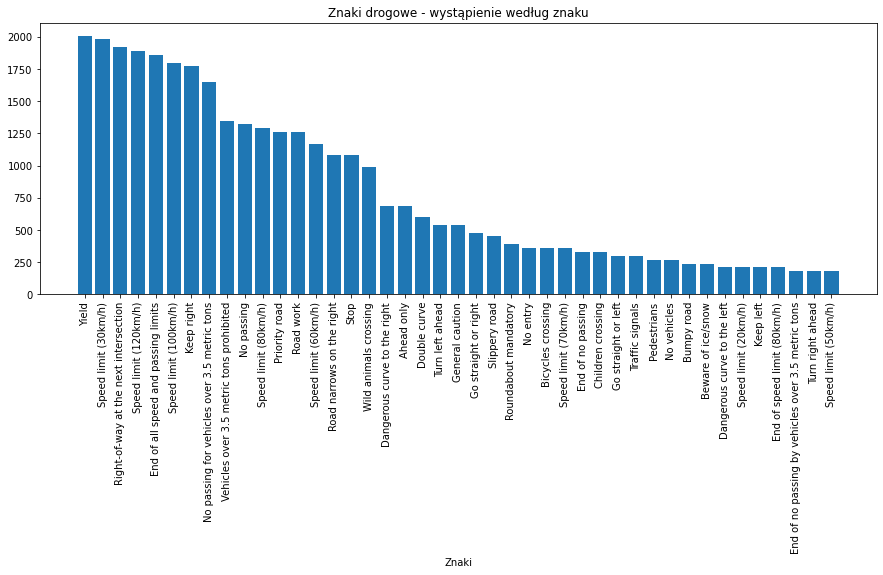

In [41]:
id_labels, cnt_labels = zip(*cnt)
ids = range(len(id_labels))

plt.figure(figsize=(15, 5))
plt.bar(ids, cnt_labels)

plt.xlabel("Znaki")
labels = [dict_signs[ id_labels[id_] ] for id_ in id_labels]
plt.xticks(ids, labels, rotation="vertical")

plt.title("Znaki drogowe - wystąpienie wg znaku")
plt.show()